## Imports

In [1]:
# stdlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set_style("white")
import numpy as np
from time import time
%matplotlib inline
# project
from TP3_python.lqg1d import LQG1D
from TP3_python.reinforce import Reinforce

/home/lawliet/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# 1. On-Policy Reinforcement Learning with Parametric Policy

In [10]:
sim = LQG1D(initial_state_type='random')

theta_histories = {}
avg_returns = {}
lrs = [0.1, 0.01, 0.001, 0.0001, 0.00001]
for lr in lrs:
    reinforce = Reinforce(sim=sim, update_rule="constant", lr=lr, n_ep=100, T=100, 
                          n_itr=100, gamma=0.9)
    reinforce.compute_optimal_policy()
    theta_histories[lr] = reinforce.theta_history
    avg_returns[lr] = reinforce.avg_returns

lr: 0.1 | Iteration N: 100 | Took: 26.79s
lr: 0.01 | Iteration N: 100 | Took: 26.46s
lr: 0.001 | Iteration N: 100 | Took: 26.96s
lr: 0.0001 | Iteration N: 100 | Took: 26.82s
lr: 1e-05 | Iteration N: 100 | Took: 27.06s


In [11]:
def compute_distance(theta_history, theta_star=-0.59):
    return [abs(theta - theta_star) for theta in theta_history]

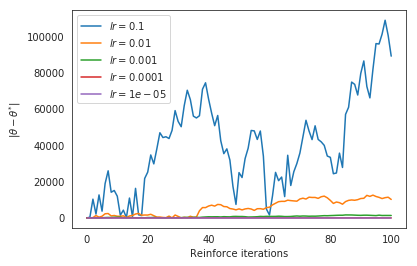

In [12]:
for lr in lrs:
    plt.plot(compute_distance(theta_histories[lr]), label=r"$lr = {}$".format(lr))
plt.xlabel("Reinforce iterations")
plt.ylabel(r"$|\theta - \theta^{*}|$")
plt.legend()
plt.savefig("report/0_4a100.png")
plt.show()

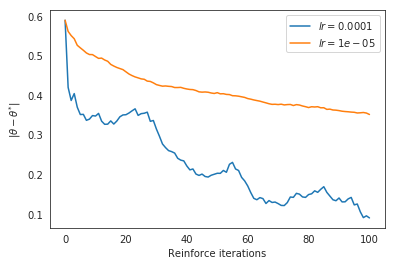

In [13]:
for lr in lrs[3:]:
    plt.plot(compute_distance(theta_histories[lr]), label=r"$lr = {}$".format(lr))
plt.xlabel("Reinforce iterations")
plt.ylabel(r"$|\theta - \theta^{*}|$")
plt.legend()
plt.savefig("report/0_4c100.png")
plt.show()

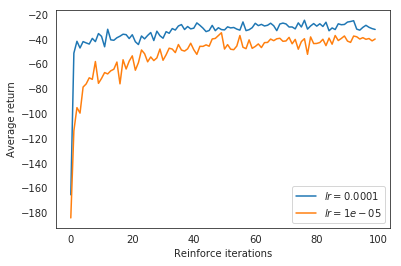

In [16]:
for lr in lrs[3:]:
    plt.plot(avg_returns[lr], label=r"$lr = {}$".format(lr))
plt.xlabel("Reinforce iterations")
plt.ylabel("Average return")
plt.legend()
plt.savefig("report/return_100")
plt.show()